# T11 Example project with tips and tricks

<div class="alert alert-info">Hint and tips are provided with blue background.</span>

## Project : Extract local field potential (LFP) from extracellular recording in the hippocampus

You are provided with a raw extracellular recording from the hippocampus of a awake behaving rat. The trace has been recorded with a silicon probe (32 channel) and you will be analyzing the signal from a single channel (the probe delivers in total 32 of such recordings). The signal contains the local field potential (LFP) as well as spiking signals. Since both occur at different frequencies, it is possible to separate them through appropriate signal filtering using spectral analysis. Your task is to extract frequency content of the LFP from the raw trace. The frequency content of the LFP trace can then be further analyzed and be linked to specific behaviors. 


### Objective of the project

Study the frequencies contained in the LFP signal. For that purpose, calculate the spectrogram showing the frequency content as a function of time. The frequency range of interest ranges from 0 to 100 Hz. Characterize which frequencies are contained in the recording, and whether these signals change over time. Which frequencies show prominent dynamics during the recording period, i.e., which frequencies show dynamics changes in spectral power over time? 



<div class="alert alert-info"> 
Using the information provided, try to learn as much as possible about the scientific and technical background of the project. 
    
* have a in depth look at the publication provided with the project (if any), here : [Gabrielle Girardeau et al. (2017) <i>Nature Neurosciene</i>](https://www.nature.com/articles/nn.4637)
* search for project keywords, here : "hippocampus", "silcon probe", "local field potential", "spectral analysis", "spectrogram", "LFR frequency ranges"
* look back at the lecture and turorial which dealt with the technique to be used in the project, here : "Course 6 : Spectral analysis of analog signals"
 </span>

### Details about the recording

The data has been recorded in the lab of [Gabrielle Girardeau](https://girardeaulab.org/). The entire trace is 6.3 hours long with running on track at the beginning, middle and end and homecage inbetween with sleep and quiet wakefulness. The electrode has been placed in the hippocampus in the CA1 pyramidal cell layer. The sampling rate of the recording is 20 kHz (or 20 000 Hz). 

To avoid issues with handling the large data file, a part of the entire recording was extracted for this project. 

#### The data 

Find below the code on how to load the data. 

<div class="alert alert-info"> Try to first understand in detail the structure of the data. What is contained in the data structure and what are the properties of the data. </span>

The data can be downloaded from [here](https://biomedicale.u-paris.fr/~mgraupe/neuralDataSciencePython/data-for-project_3.npy). 

In [24]:
import numpy as np    
import matplotlib.pyplot as plt
# if you use qt (instead of inline what we used in the course) you can zoom in on the data which is useful for large traces
#%matplotlib qt 
%matplotlib inline

data = np.load('data-for-project_3.npy')

print(type(data))
print(np.shape(data))

print(data[0][:20])
print(data[1][:20])

dt = np.mean(np.diff(data[0]))
print(dt)
print('sampling rate is : ', 1/dt ,'Hz')

<class 'numpy.ndarray'>
(2, 36000000)
[0.00000000e+00 5.00000006e-05 1.00000000e-04 1.50000000e-04
 2.00000000e-04 2.50000000e-04 3.00000001e-04 3.50000000e-04
 4.00000000e-04 4.50000000e-04 5.00000000e-04 5.50000001e-04
 6.00000000e-04 6.50000000e-04 7.00000001e-04 7.50000000e-04
 8.00000001e-04 8.50000000e-04 9.00000000e-04 9.50000001e-04]
[ 898.  882.  882.  866.  882.  874.  898.  942.  978.  970. 1006.  982.
  978.  970.  950.  990.  982.  974.  986.  970.]
5.000000000000001e-05
sampling rate is :  19999.999999999996 Hz


#### Plotting 

Plot the raw data!

<div class="alert alert-info">As always, plotting the data provide immediate and useful insights. Generally, plot data and results helps to develop a better understanding. I would recommend plotting in an external window, since this allows to zoom into the data. This is in particular useful for large data-sets. Don't forget to include figures in the jupyter-notebook for the project presentation and for illustrating the results obtained. 
    
 * zoom into the data and explore features at many different time points, here : check out the interval [40,41] sec
 * try to get a first rough estimate about the project question through visual inspection, here : what is the frequency present in the signal 
 * if data-set is too large, plot and inspect smaller sections of the data 
 * figures can be implemented with the code : ![Data Figure](Figure_data.png)
</span>

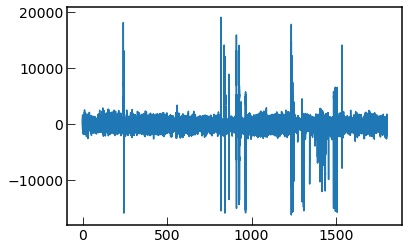

In [25]:
# plot the data - check around 40 s for example

plt.plot(data[0],data[1])
plt.show()

#### Analysis

<div class="alert alert-info">Using the course material, try to understand the analysis to perform and how to implement it. 
    
* Pick the right lecture and read up about the analyis method. Maybe read more extensive explanations on the internet about the analysis, here : [Spectral analysis on Wikipedia, for exmaple](https://en.wikipedia.org/wiki/Spectral_density_estimation)
* Use example code snippets from the tutorial to start programming, here : "T12 : Calculating the spectrogram of a signal"
* Go through the code and try to understand the code. 
* You could also start from a code snippet you find on the internet. There are many possible ways to realize similar analysis. The difficulty is to find what suits best your problem. 
</span>

We take the code snipplet from tutorial 12 where we calculate the spetral content using FFT in numpy.

In [26]:
windowLength = 1024
hanningWindow = np.hanning(windowLength)
fs = 20000
exampleSlice = slices[1]*hanningWindow

nyquist = fs/2.                                  #10
fSpaceSignal = np.fft.fft(exampleSlice)               #11
fBase = np.linspace(0,nyquist,int(np.floor(len(exampleSlice)/2)+1)) #12
halfTheSignal = fSpaceSignal[:len(fBase)]        #13
absSignal = np.abs(halfTheSignal)                #14
powe = np.power(absSignal,2)                     #15

**Adaptation**

<div class="alert alert-info">Adapt the code for the project. In other words, start from the tutorial code and adapt it  
    
* Change the values and fill in the project specifics. 
* It is useful and good practise to separate **computations**: the actual implementation of the analysis and **visualization** : the figure generation. 
</span>


We need to split the signal is segments and calculate the frequency content sequentially. 

We start by chopping up the signal into slices of 1024 samples, each slice overlapping the previous by 100 samples. The resulting slices array contains one slice per row. We found a `scikit-learn` function online to perform that : [Frequency and the Fast Fourier Transform](https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html)

In [27]:
from skimage import util

windowLength = 1024

slices = util.view_as_windows(data[1], window_shape=(windowLength,), step=100)

print(np.shape(data[1]))
print(np.shape(slices))
print(windowLength)

nSlices = len(slices)
print(nSlices)

(36000000,)
(359990, 1024)
1024
359990


**Computation**

In most cases, it is more efficient and instructive to perform the analysis first on a subset of the data.

Optimize the code and visualization until the desired output is generated. Once the output is plausible and correct, move on to apply the analysis to the entire data.

Below, we perform the FFT on the first slice of the data. 


In [28]:
print(np.shape(slices))
fs = 20000

nyquist = fs/2.                                  #10
fSpaceSignal = np.fft.fft(slices[0])               #11
fBase = np.linspace(0,nyquist,int(np.floor(len(slices[0])/2)+1)) #12
halfTheSignal = fSpaceSignal[:len(fBase)]        #13

absSignal = np.abs(halfTheSignal)                #14
powe = np.power(absSignal,2)                     #15

print(powe)

(359990, 1024)
[4.85887067e+11 1.19667088e+11 1.91150653e+10 4.90925205e+09
 2.75762249e+09 2.88551936e+09 1.31236587e+09 1.07841105e+08
 1.08302934e+09 2.90146788e+07 9.40771928e+08 5.58570092e+08
 1.64163786e+08 7.79580028e+08 1.44883259e+08 1.84644809e+08
 4.09734942e+08 4.64433833e+07 7.39898197e+07 2.47578859e+08
 1.44743754e+07 3.02331287e+07 7.06002311e+07 6.78661405e+07
 1.18797412e+07 9.54919152e+07 4.08256700e+07 3.97106942e+07
 3.29102436e+07 1.55519062e+07 4.94546289e+07 2.91428214e+07
 1.70877963e+07 3.23296642e+07 1.22379932e+07 2.58319234e+07
 4.04648108e+07 1.90237161e+07 3.90823404e+07 2.40603771e+07
 3.37884741e+07 3.06829487e+07 9.75757431e+07 2.07513211e+07
 2.21262157e+07 5.25771705e+07 8.49151588e+06 1.20636878e+07
 6.14728079e+06 1.94331235e+07 2.19178986e+07 4.90310406e+07
 3.21073399e+07 3.15680454e+06 1.39995030e+07 2.71011165e+07
 1.48012233e+07 1.85146074e+07 6.70952231e+06 1.23332285e+05
 1.64283466e+07 1.00448098e+07 2.58252285e+05 8.99943319e+06
 6.643744

**Figure generation**

Check the outcome visually at all stages. 

(0.0, 100.0)

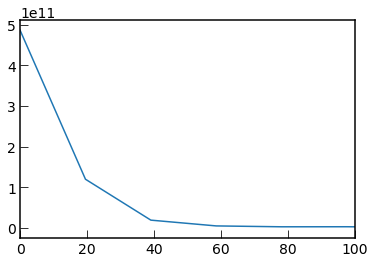

In [29]:
plt.plot(fBase,powe)
plt.xlim(0,100)

**Refinement**

Here in particular, we need to change the resolution of the frequency axis. This can be done by changing the window length. 

(0.0, 100.0)

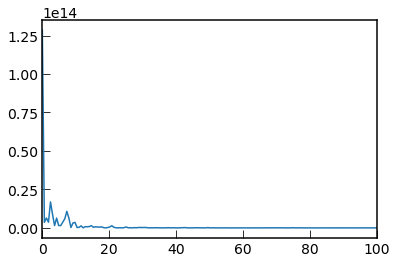

In [30]:
windowLength = 1024*2**5
fs = 20000

slices = util.view_as_windows(data[1], window_shape=(windowLength,), step=100)

nyquist = fs/2.                                  #10
fSpaceSignal = np.fft.fft(slices[0])               #11
fBase = np.linspace(0,nyquist,int(np.floor(len(slices[0])/2)+1)) #12
halfTheSignal = fSpaceSignal[:len(fBase)]        #13
absSignal = np.abs(halfTheSignal)                #14
powe = np.power(absSignal,2)                     #15

plt.plot(fBase,powe)
plt.xlim(0,100)

(0.0, 20.0)

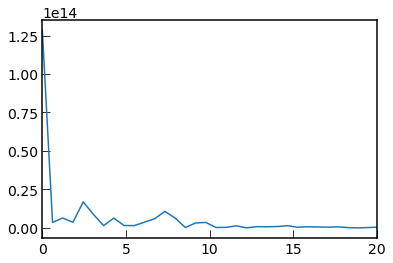

In [31]:
plt.plot(fBase,powe)
plt.xlim(0,100)
plt.xlim(0,20)

**Apply to entire data-set**

Extend the analysis to the entire data-set. Use the above developped code and apply it to the entire data-set.

<div class="alert alert-info">Sometimes, the computation can take minutes or even hours, when the data-set is large or the computations heavy. Be patient. You can try to let the analysis run over night.</div>

Copy all relevant code in one window. That way you avoid surprises of a stray variable which has been initialized with a strange value somewhere else.

For the above problem, let's write a loop which calculates spetral power for all slices. 

In [32]:
windowLength = 1024*2**6
fs = 20000

slices = util.view_as_windows(data[1], window_shape=(windowLength,), step=int(windowLength*0.2))
timeSlices = util.view_as_windows(data[0], window_shape=(windowLength,), step=int(windowLength*0.2))

print(np.shape(slices))
allPower = []
for i in range(len(slices)):
    #print(i)
    nyquist = fs/2.                                  #10
    fSpaceSignal = np.fft.fft(slices[i])               #11
    fBase = np.linspace(0,nyquist,int(np.floor(len(slices[i])/2)+1)) #12
    halfTheSignal = fSpaceSignal[:len(fBase)]        #13
    absSignal = np.abs(halfTheSignal)                #14
    powe = np.power(absSignal,2)                     #15
    allPower.append(powe)



(2742, 65536)


**Figure generation**
Show your results in figure with captions and labels.

<div class="alert alert-info">Producing good representations of results in form of figures takes time and effort. Try to find the visualization which best conveys your result. Certain measures have standard representations (e.g. frequency content is shown in spectrograms, spikes in raster plots, etc.).</div>

In [33]:
allPower= np.asarray(allPower)
print(np.shape(allPower))
print(fBase)
fmask = fBase<100
print(fmask)


(2742, 32769)
[0.00000000e+00 3.05175781e-01 6.10351562e-01 ... 9.99938965e+03
 9.99969482e+03 1.00000000e+04]
[ True  True  True ... False False False]


The specific unit used for the ratio is the decibel, `20*log10()` (amplitude ratio).

Text(0, 0.5, 'frequency (Hz)')

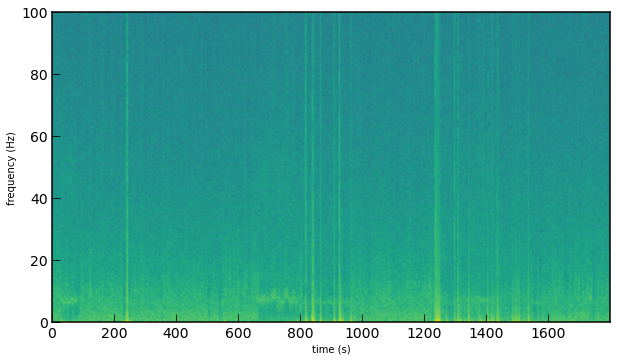

In [34]:

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
allPoNorm = allPower[:,fmask]/np.max(allPower[:,fmask])
ax.imshow(np.transpose(20*np.log10(allPoNorm)),origin='lower',extent=[0,data[0][-1],0,100],aspect=10,interpolation='bicubic')
ax.set_xlabel('time (s)')
ax.set_ylabel('frequency (Hz)')

**Further analysis and interpretation of results**

The specific objective for this project was to find frequency ranges which exhibit dynamics over time. Here, it looks like as if theta power is present only for certain time intervals. Let's extract the mean power in the theta range and display it over time.

<div class="alert alert-info">Going an additional step after obtaining the main result provides often great insight, doesn't take much effort and increases the quality/impact of your work.</div>

Plot a the mean power over time. 

Text(0, 0.5, 'average spectral power density (dB)')

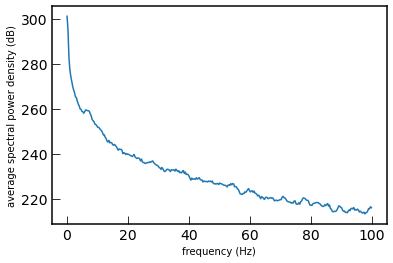

In [35]:
thetaPower = np.mean(allPower[:,fmask],axis=0)

plt.plot(fBase[fmask],20*np.log10(thetaPower))
plt.xlabel('frequency (Hz)')
plt.ylabel('average spectral power density (dB)')

Plot the power in the theta band as a function of time. 

Text(0, 0.5, 'mean theta power (a.u.)')

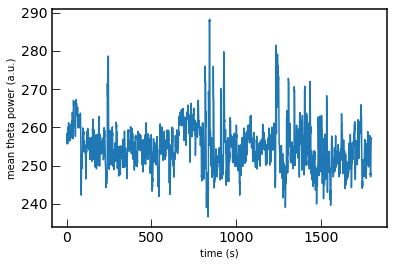

In [36]:

freqBand = (5<fBase)&(9>fBase)

thetaPower = np.mean(allPower[:,freqBand],axis=1)

plt.plot(np.mean(timeSlices,axis=1),20*np.log10(thetaPower))
plt.xlabel('time (s)')
plt.ylabel('mean theta power (a.u.)')

**Discussion**

<div class="alert alert-info">Finish with a disucssion which contains a summary of your results and an interpretation. What does it mean? What would be further steps?</div>

...